#**Lab 3: Analyzing Data in Python**

# RPAD 676: Data Science for the Public Good

## Author:
## Date:

## Instructions
In this assignment, you will conduct your own analysis using the provided dataset. Follow the prompts in each section and write the necessary Python code to complete the tasks.

**Tasks:**
- Load and explore the dataset
- Perform basic data cleaning (handling missing values, etc.)
- Generate descriptive statistics
- Create at least one meaningful visualization
- Summarize key insights from your analysis

Remember to document your thought process in markdown cells throughout the notebook.

In [35]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Load the dataset (replace with actual file path)
data = pd.read_csv('digital_services_data.csv')  # Replace with actual dataset file

# Display the first few rows
data.head()

,user_id,TimeTaken,UserSatisfaction,Age,DisabilityStatus,DigitalLiteracy,Gender,EmploymentStatus,EducationLevel,InternetAccess,ErrorRates,RequestedHelp,SatisfactionOtherServices,WillingnessFutureUse,ReceivesSocialServices,Agency
0,2,919,4,38,0,5,Female,Retired,Some College,Broadband,1,0,6,10,0,Department of Health and Human Services
1,9,759,10,78,0,5,Male,Employed,High School,Broadband,1,0,3,8,0,Department of Public Safety
2,13,853,8,45,0,3,Female,Unemployed,Bachelor,Broadband,2,0,6,10,0,Department of Education
3,15,503,4,66,0,3,Male,Student,Bachelor,Broadband,1,0,2,1,0,Department of Public Safety
4,25,857,7,69,0,1,Female,Employed,Some College,Mobile Data,4,0,3,1,0,Department of Education


## Descriptive Statistics

Compute and interpret basic statistics for the dataset:
- Mean, median, mode
- Standard deviation, min, max
- Any other relevant metrics

_Write your code below:_

**See mean, std, min, and max below.**

In [ ]:
# Your code here

print("Descriptive Statistics for Numeric Variables:")
print(data.describe())

Descriptive Statistics for Numeric Variables:
           user_id    TimeTaken  UserSatisfaction          Age  \
count  1000.000000  1000.000000       1000.000000  1000.000000   
mean    500.500000  1059.025000          4.946000    49.039000   
std     288.819436   344.668741          2.901293    17.891998   
min       1.000000     0.000000          1.000000    18.000000   
25%     250.750000   830.500000          2.000000    34.000000   
50%     500.500000  1064.000000          5.000000    50.000000   
75%     750.250000  1274.000000          7.000000    64.000000   
max    1000.000000  2136.000000         10.000000    79.000000   

       DisabilityStatus  DigitalLiteracy   ErrorRates  RequestedHelp  \
count       1000.000000      1000.000000  1000.000000    1000.000000   
mean           0.153000         3.053000     2.387000       0.287000   
std            0.360168         1.397907     2.384726       0.452588   
min            0.000000         1.000000     0.000000       0.000000   

**See modes for all columns below.**

In [ ]:
import pandas as pd
def find_mode_from(file_path):
    df = pd.read_csv(file_path)
    return df.mode().iloc[0]

mode_all = find_mode_from('/content/digital_services_data.csv')
print(f"Mode of all columns:\n{mode_all}")

Mode of all columns:
user_id                                                1
TimeTaken                                          753.0
UserSatisfaction                                     1.0
Age                                                 45.0
DisabilityStatus                                     0.0
DigitalLiteracy                                      4.0
Gender                                              Male
EmploymentStatus                                Employed
EducationLevel                               High School
InternetAccess                                 Broadband
ErrorRates                                           0.0
RequestedHelp                                        0.0
SatisfactionOtherServices                            9.0
WillingnessFutureUse                                10.0
ReceivesSocialServices                               1.0
Agency                       Department of Public Safety
Name: 0, dtype: object


## Explanation

In this section, I found the mean, median, standard deviation, min, and max for all quantitative data, and the mode for all data. I found that satisfaction with other services, willingness for future use, and age displayed the highest standard deviations. Variation in age made sense since there was likely a wide age range of people who participated in this process, but I was curious as to what factors drove the other two variables.

## Data Visualization

Create at least one visualization that highlights an interesting aspect of the dataset. You may use bar plots, histograms, scatter plots, or other relevant charts.

_Write your code below:_

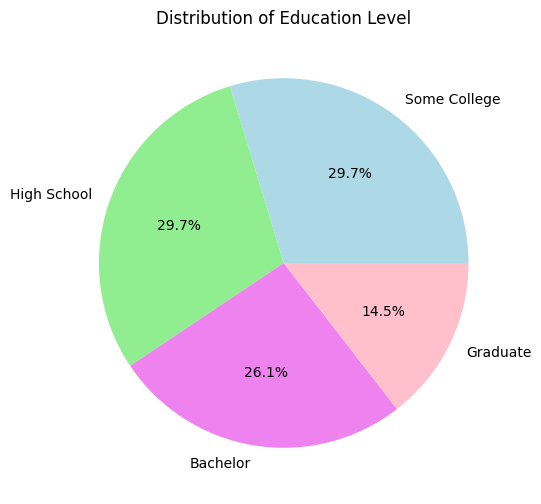

In [53]:
# Pie Chart

agency_counts = data['EducationLevel'].value_counts()
agency_counts.plot(kind='pie', autopct='%1.1f%%', colors=["lightblue", "lightgreen", "violet", "pink"], figsize=(6,6))
plt.title("Distribution of Education Level")
plt.ylabel("")
plt.show()

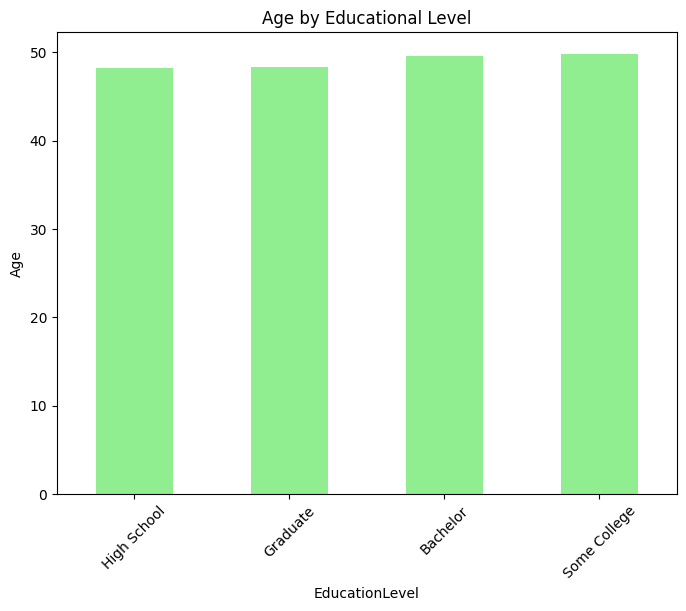

In [56]:
# Bar

data.groupby('EducationLevel')['Age'].mean().sort_values().plot(kind='bar', color='lightgreen', figsize=(8,6))
plt.xlabel("EducationLevel")
plt.ylabel("Age")
plt.title("Age by Educational Level")
plt.xticks(rotation=45)
plt.show()

## Explanation

First, I identified variation in education level across responses, finding a relatively even split among most categories. Then, I created a bar chart to identify the mean age of respondents with each education level. The bar charts results illustrated that respondents with each education level had a similar mean age. This indicates that any differences across age were unlikely to be driven by education level.

## Inferential Statistics

### T-Tests
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [57]:
# Calculate the mean of a specific continuous variable across one categorical variable
outcome_variable = 'WillingnessFutureUse'  # Change to the variable of interest
categorical_variable = 'DisabilityStatus'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)

print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of WillingnessFutureUse grouped by DisabilityStatus:
DisabilityStatus
0    5.73
1    5.94
Name: WillingnessFutureUse, dtype: float64


In [58]:
# T-Test: Comparing means across two groups

t_stat, p_val = stats.ttest_ind(
    data[data['DisabilityStatus'] == 1]['DigitalLiteracy'],
    data[data['DisabilityStatus'] == 0]['DigitalLiteracy']
)
print(f"T-test: Effect of Disability Status on Digital literacy, t-statistic={t_stat:.4f}, p-value={p_val:.4f}")

T-test: Effect of Disability Status on Digital literacy, t-statistic=-1.0752, p-value=0.2825


## Explanation

Since willingness of future use showed one of the highest standard deviations, I decided to explore whether significant variation existed between people with disabilities versus people without disabilities. The T-test results indicated a small but statistically insignificant difference between willingness of future use and disability status (p>0.05).


### ANOVA
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [49]:
# Means across more than two groups

outcome_variable = 'Age'  # Change to the variable of interest
categorical_variable = 'EmploymentStatus'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)
print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of Age grouped by EmploymentStatus:
EmploymentStatus
Employed      49.10
Retired       51.26
Student       46.97
Unemployed    48.32
Name: Age, dtype: float64


In [50]:
# ANOVA: Comparing time taken across agency types

aov = smf.ols(f'{outcome_variable} ~ C({categorical_variable})', data=data).fit()
anova_table = sm.stats.anova_lm(aov, typ=2)

print("\nANOVA Results:")
print(anova_table)


ANOVA Results:
                            sum_sq     df         F    PR(>F)
C(EmploymentStatus)    1181.736041    3.0  1.231355  0.297054
Residual             318621.742959  996.0       NaN       NaN


In [51]:
# Conduct post hoc test (Tukey HSD) if ANOVA is significant
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("\nANOVA is significant. Conducting post hoc Tukey HSD test:")
    tukey_results = pairwise_tukeyhsd(endog=data[outcome_variable], groups=data[categorical_variable], alpha=alpha)
    print(tukey_results)
else:
    print("\nANOVA is not significant. No post hoc test needed.")


ANOVA is not significant. No post hoc test needed.


<ipython-input-51-99da7c575cf6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


## Explanation

Since age had a relatively high standard deviation, I was curious to see whether age correlated with other demographic factors that we might typically associate with it, including employment status. Common sense tells us that the mean age of students would be significantly lower than retirees, and people who are employed or unemployed may fall in the middle. However, the ANOVA between these two variables was insignificant, indicating that respondents showed similar educational attainment levels across all ages.

## Key Insights

Summarize your findings in a short paragraph. What patterns or trends did you observe? Were there any surprises in the data? How might these insights be useful?

_Write your response below:_

I expected to find more relationships when exploring this data, so I found the lack of relationships in the content above particularly interesting. Traditional patterns, such as a clear correlation between age and employment status, or to a lesser extent, age and education level, were absent. This suggests that the dataset may not be fully representative of real-world distributions, as age group distribution appears similar across categories where we would typically see more distinctions.

This raises questions about how the data’s composition affects our ability to observe the impacts of education or employment status. Does this concentration limit our ability to draw broad conclusions, or does it actually make these relationships clearer by isolating the effects of age? Additionally, I found it unclear what factors drove the higher variance in certain variables if demographic characteristics like age or educational attainment were not primary contributors.